# Basics but no standard image processing

In [1]:

from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import misc
from sklearn.cluster import KMeans
import seaborn as sns
from numpy import linalg as la
from math import floor

def roundup(number):
    return round(number+.5)

In [36]:
#show whats on the current directory
os.listdir()

['lychenJPG.jpeg',
 '.DS_Store',
 'E1D73264-0143-42C7-B511-562343FB6D27.JPG',
 'IMG_3807.JPG',
 'lychen.png',
 'WhatsApp Image 2019-07-26 at 18.07.58.jpeg',
 'vuelta.png',
 'IMG_3541.JPG',
 '4adf8a0d-0382-4354-9880-aeed9fea6d30.png',
 'A323CDA5-2FE5-4300-BB63-F480968ED222-1000.jpg',
 'cuadros.png',
 '.ipynb_checkpoints',
 'IMG_9992.JPG',
 'panoramica',
 'imageProcessing.ipynb']

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


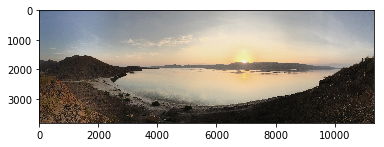

In [30]:
#read image
img=misc.imread('E1D73264-0143-42C7-B511-562343FB6D27.jpg')
plt.imshow(img,cmap=plt.cm.gray)


In [33]:
# get some important details, sizex, sisey.
ysize=img.shape[0]
xsize=img.shape[1]
print(f'ysize: {ysize} and xsize {xsize}')

ysize: 3812 and xsize 11340


In [213]:
#save image
misc.imsave('cuadros.png', a)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


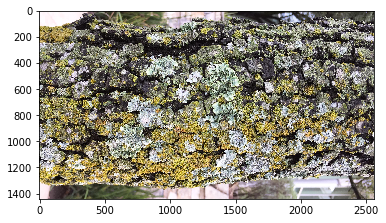

In [6]:
#rotate image and save
rotated = ndimage.rotate(img, -90)
misc.imsave('vuelta.png', rotated)
plt.imshow(rotated, cmap=plt.cm.gray)      

# Slice experiments, try todo the horizontal ones.

In [131]:
def slice_image_r_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((maping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  



In [211]:
img.shape[0]


3456

In [143]:
def slice_image_r_n(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    maping=np.random.permutation(slices)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((maping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img


In [134]:
def slice_image_m(img,slices):
    ysize=img.shape[0]
    xsize=img.shape[1]
    scale=ysize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    new_img=img
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idy1=int(i*scale)
        idy2=int((mapping[i])*scale)


        slicer1=(slice(idy1, idy1+int(scale), 1), slice(0, xsize, 1),slice(0, 3, 1))

        slicer2=(slice(idy2, idy2+int(scale), 1), slice(0, xsize, 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  
    return new_img



In [132]:
def slice_image_n(img,slices):
    scale=xsize/slices
    new_img=np.ndarray(shape=(ysize,xsize,3), dtype=int, order='F')
    
    mapping=[]
    for i in range(slices):
        if i%2==0:
            mapping.append(i+1)
        else:
            mapping.append(i-1)
    print(mapping)
    for i in range(slices):
        idx1=int(i*scale)
        idx2=int((mapping[i])*scale)


        slicer1=(slice(0, ysize, 1), slice(idx1,idx1+int(scale), 1),slice(0, 3, 1))

        slicer2=(slice(0, ysize, 1), slice(idx2, idx2+int(scale), 1), slice(0, 3, 1))
        new_img[slicer1]=img[slicer2]
    plt.imshow(new_img, cmap=plt.cm.gray)  


    return new_img

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170, 173, 172, 175, 174, 177, 176, 179, 178, 181, 180, 183, 182, 185, 184, 187, 186, 189, 188, 191, 190, 193, 192, 195, 194, 197, 196, 199, 198, 201, 200, 203, 202, 205, 204, 207, 206, 209, 208, 211, 210, 213, 212, 215, 214, 217, 216, 219, 218, 221, 220,

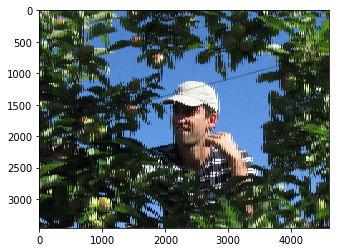

In [232]:
a=slice_image_n(img,int(4608/20))

[1, 0, 3, 2, 5, 4, 7, 6, 9, 8, 11, 10, 13, 12, 15, 14, 17, 16, 19, 18, 21, 20, 23, 22, 25, 24, 27, 26, 29, 28, 31, 30, 33, 32, 35, 34, 37, 36, 39, 38, 41, 40, 43, 42, 45, 44, 47, 46, 49, 48, 51, 50, 53, 52, 55, 54, 57, 56, 59, 58, 61, 60, 63, 62, 65, 64, 67, 66, 69, 68, 71, 70, 73, 72, 75, 74, 77, 76, 79, 78, 81, 80, 83, 82, 85, 84, 87, 86, 89, 88, 91, 90, 93, 92, 95, 94, 97, 96, 99, 98, 101, 100, 103, 102, 105, 104, 107, 106, 109, 108, 111, 110, 113, 112, 115, 114, 117, 116, 119, 118, 121, 120, 123, 122, 125, 124, 127, 126, 129, 128, 131, 130, 133, 132, 135, 134, 137, 136, 139, 138, 141, 140, 143, 142, 145, 144, 147, 146, 149, 148, 151, 150, 153, 152, 155, 154, 157, 156, 159, 158, 161, 160, 163, 162, 165, 164, 167, 166, 169, 168, 171, 170]


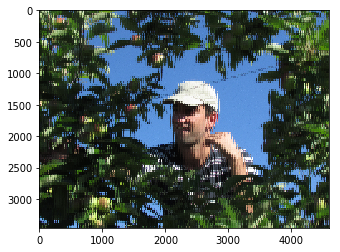

In [233]:
a=slice_image_m(a,int(3456/20))

In [ ]:
#Nueva funcion que cada slice la mueve derecha izquierda

# K means n color palette

In [253]:
img

array([[[ 88,  86,  97],
        [130, 129, 137],
        [140, 139, 147],
        ...,
        [209, 186, 196],
        [208, 185, 195],
        [208, 185, 195]],

       [[ 96,  95, 103],
        [134, 133, 141],
        [142, 141, 147],
        ...,
        [211, 188, 198],
        [211, 188, 198],
        [210, 187, 197]],

       [[107, 106, 112],
        [139, 138, 144],
        [146, 145, 150],
        ...,
        [214, 191, 199],
        [214, 191, 201],
        [214, 191, 201]],

       ...,

       [[255, 249, 253],
        [255, 249, 253],
        [255, 249, 253],
        ...,
        [255, 241, 246],
        [255, 241, 246],
        [255, 241, 246]],

       [[255, 249, 253],
        [255, 249, 253],
        [255, 249, 253],
        ...,
        [255, 241, 246],
        [255, 241, 246],
        [255, 241, 246]],

       [[255, 250, 254],
        [255, 250, 254],
        [255, 250, 254],
        ...,
        [254, 242, 246],
        [254, 242, 246],
        [254, 242, 246]]

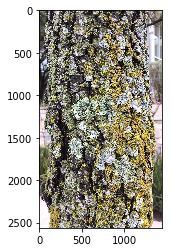

In [244]:
#def color_palette(img,n=4):
n=4
ysize=img.shape[0]
xsize=img.shape[1]
new_img=np.reshape(img,(xsize*ysize,3))
model=KMeans(n_clusters=n,random_state=42).fit(new_img)#verbose=1
#sns.palplot(colors)
plt.imshow(img, cmap=plt.cm.gray) 
#return model

(3687840, 3)


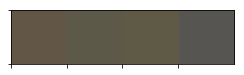

In [247]:
colors=[]
print(new_img.shape)
new_img=np.reshape(new_img,(ysize*xsize,3))


for i in range(n):
    colors.append(np.mean(new_img[model.labels_==i],axis=0))
    colors[i]=colors[i]/sum(colors[i])
    #new_img[model.labels_==i]=colors[i]
sns.palplot(sns.color_palette(colors))
new_img=np.reshape(new_img,(ysize*xsize,3))

#plt.imshow(img, cmap=plt.cm.gray) 
#plt.show()

# colores

(3687840, 3)
[0.58262298 0.57994242 0.58179807 0.57741329]


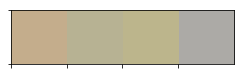

In [255]:
colors=[]
print(new_img.shape)
new_img=np.reshape(new_img,(ysize*xsize,3))


for i in range(n):
    colors.append(np.median(new_img[model.labels_==i],axis=0))
    colors[i]=colors[i]/sum(colors[i])
    #new_img[model.labels_==i]=colors[i]
colors=np.array(colors)
print(np.linalg.norm(colors,axis=1))
sns.palplot(2*colors)
new_img=np.reshape(new_img,(ysize*xsize,3))
#plt.imshow(img, cmap=plt.cm.gray) 
#plt.show()

In [172]:
# clusters from image.
sns.palplot(colors)
new_img=np.reshape(new_img,(ysize,xsize,3))
plt.imshow(new_img, cmap=plt.cm.gray) 



/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:1596: RuntimeWarning: divide by zero encountered in double_scalars
  fig_aspect = figH / figW
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Users/jeroaranda/anaconda3/lib/pyth

RuntimeError: libpng signaled error

<Figure size 0x72 with 1 Axes>

In [174]:
new_img=np.reshape(new_img,(ysize*xsize,3))



In [8]:
img=rotated

# cut in squares a panoramic image.


0


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


1


/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


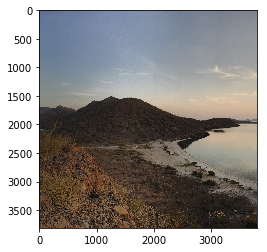

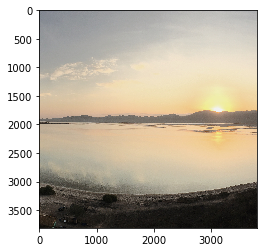

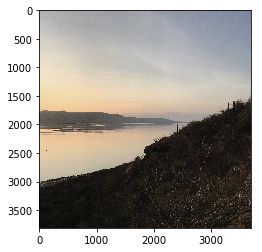

In [34]:



    plt.imshow(new_img, cmap=plt.cm.gray)
